# **1. Perkenalan Dataset**

Dataset yang digunakan dalam proyek ini adalah **Water Potability Dataset**. Dataset ini berisi metrik kualitas air untuk 3276 badan air yang berbeda.

**Tujuan:**
Membangun model Machine Learning untuk memprediksi apakah air aman untuk diminum (*Potable*) atau tidak, berdasarkan fitur-fitur kimiawinya.

**Informasi Atribut:**
1. **ph**: pH air (0 hingga 14).
2. **Hardness**: Kapasitas air untuk mengendapkan sabun (mg/L).
3. **Solids**: Total padatan terlarut (ppm).
4. **Chloramines**: Jumlah kloramin dalam air (ppm).
5. **Sulfate**: Jumlah sulfat terlarut (mg/L).
6. **Conductivity**: Konduktivitas listrik air (μS/cm).
7. **Organic_carbon**: Jumlah karbon organik (ppm).
8. **Trihalomethanes**: Jumlah trihalometana (μg/L).
9. **Turbidity**: Ukuran sifat pemancar cahaya air (NTU).
10. **Potability**: Target (1 = Aman dimunum, 0 = Tidak aman).

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*) adalah **Water Potability Dataset**


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Konfigurasi plot
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Memuat dataset
df = pd.read_csv('/content/water_potability.csv')

# Menampilkan 5 baris pertama
print("Lima baris pertama dataset:")
display(df.head())

# Menampilkan informasi dataset
print("\nInformasi Dataset:")
df.info()

Lima baris pertama dataset:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.


Jumlah Missing Values per Kolom:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


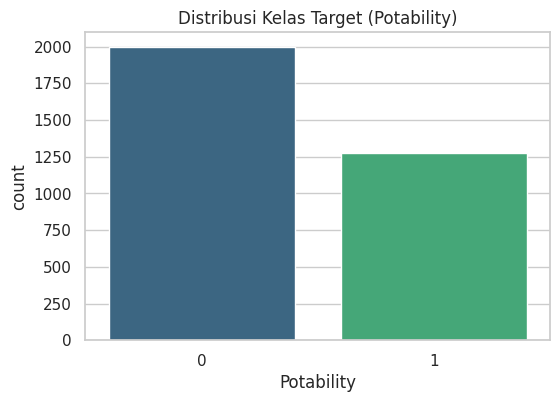

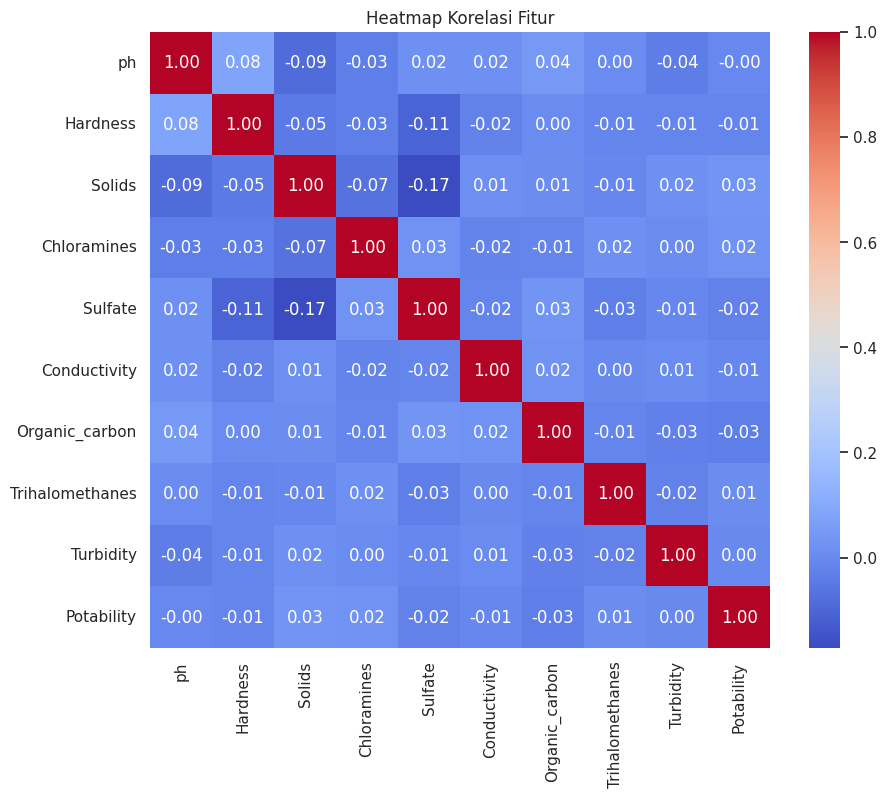

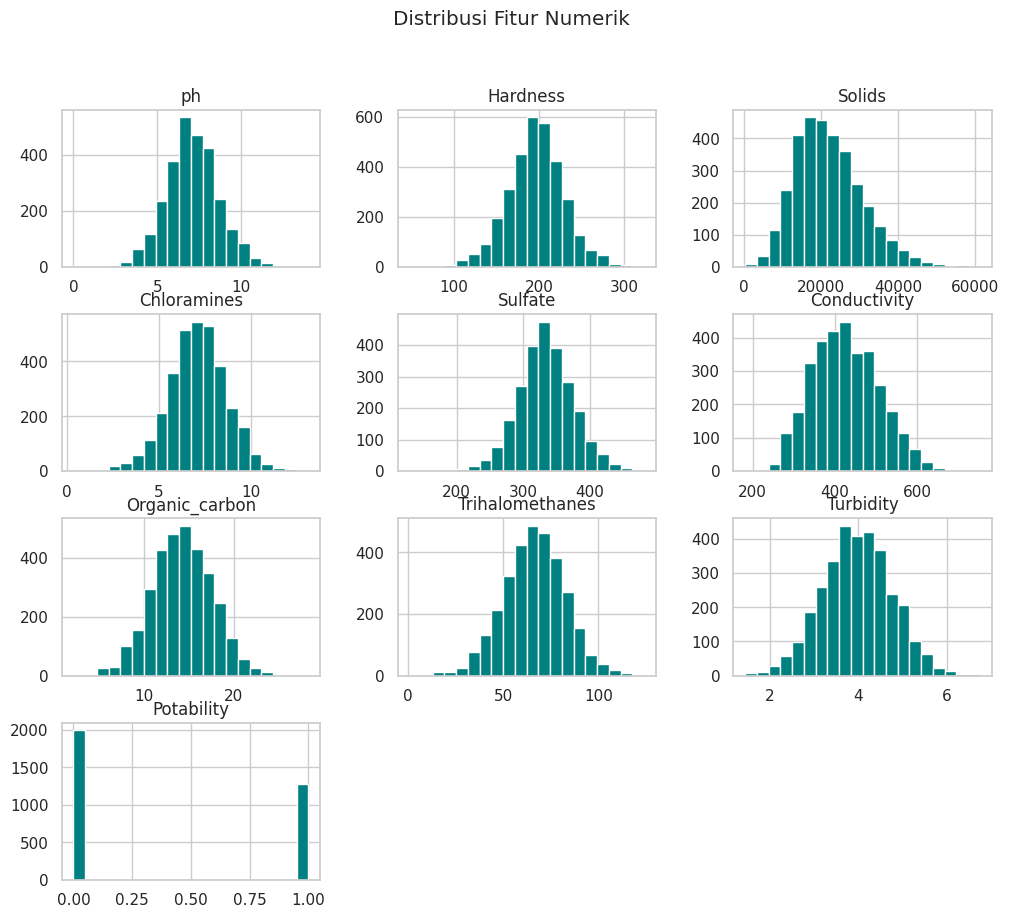

In [5]:
# 1. Cek Missing Values
print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

# 2. Visualisasi Target (Potability)
plt.figure(figsize=(6, 4))
sns.countplot(x='Potability', data=df, palette='viridis')
plt.title('Distribusi Kelas Target (Potability)')
plt.show()

# 3. Melihat Korelasi antar Fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur')
plt.show()

# 4. Distribusi Data (Histogram)
df.hist(figsize=(12, 10), bins=20, color='teal')
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [6]:
# --- 1. Handling Missing Values ---
# Mengunakan SimpleImputer dengan strategi 'mean'
imputer = SimpleImputer(strategy='mean')

# Fitur yang memiliki missing values: ph, Sulfate, Trihalomethanes
# Namun kita akan terapkan ke semua fitur numerik agar pipeline konsisten
df_clean = df.copy()
cols_to_impute = df_clean.columns.drop('Potability') # Kecuali target

df_clean[cols_to_impute] = imputer.fit_transform(df_clean[cols_to_impute])

# Cek kembali apakah masih ada missing values
print("Sisa missing values setelah imputasi:", df_clean.isnull().sum().sum())

# --- 2. Splitting Data (Fitur & Target) ---
X = df_clean.drop('Potability', axis=1)
y = df_clean['Potability']

# --- 3. Normalisasi/Standarisasi ---
# StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Mengubah kembali ke DataFrame agar rapi
X_scaled_df = pd.DataFrame(X_scaled, columns=cols_to_impute)

# Menggabungkan kembali dengan target untuk disimpan
df_final = pd.concat([X_scaled_df, y], axis=1)

print("\nData setelah preprocessing:")
display(df_final.head())

# --- 4. Menyimpan Data Bersih ---
df_final.to_csv('water_potability_clean.csv', index=False)
print("Dataset bersih berhasil disimpan sebagai 'water_potability_clean.csv'")

Sisa missing values setelah imputasi: 0

Data setelah preprocessing:


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-6.043133e-16,0.259195,-0.139471,0.112415,9.613574e-01,1.708954,-1.180651,1.306149,-1.286298,0
1,-2.289339e+00,-2.036414,-0.385987,-0.307694,3.145987e-15,2.062575,0.270597,-0.638480,0.684218,0
2,6.928678e-01,0.847665,-0.240047,1.360594,3.145987e-15,-0.094032,0.781117,0.001509,-1.167365,0
3,8.409504e-01,0.547651,0.000493,0.592008,6.395190e-01,-0.778830,1.255134,2.152874,0.848412,0
4,1.368569e+00,-0.464429,-0.460249,-0.363698,-6.541765e-01,-0.343939,-0.824357,-2.181599,0.138786,0


Dataset bersih berhasil disimpan sebagai 'water_potability_clean.csv'
